In [2]:
import os
from PIL import Image
from matplotlib import pyplot as plt
import pandas as pd
from IPython.display import display

import torch
import torch.nn.functional as F
from torchvision import transforms as T

from RAFDB_dataset import RAFDBDataset

from models.ConvNet import ConvNet
from models.ResNet import construct_ResNet_model
from models.VGG import construct_VGG_model
from models.GoogLeNet import construct_GoogLeNet_model
from models.ViT import construct_ViT_model

Load the validation dataset

In [3]:
val_dataset = RAFDBDataset('./raf-db-dataset', train=False)

Load the models with their best weights

In [4]:
classes = val_dataset.classes
classes_len = len(classes)

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

model_ConvNet = ConvNet(classes_len).to(device).eval()
model_ResNet = construct_ResNet_model(classes_len).to(device).eval()
model_VGG = construct_VGG_model(classes_len).to(device).eval()
model_GoogLeNet = construct_GoogLeNet_model(classes_len).to(device).eval()
model_ViT = construct_ViT_model(classes_len).to(device).eval()
model_ViT_mod = construct_ViT_model(classes_len, 100, 10).to(device).eval()


model_ConvNet.load_state_dict(
    torch.load(os.path.join('./results/ConvNet', 'best_model.pth'), map_location=device)
)
model_ResNet.load_state_dict(
    torch.load(os.path.join('./results/ResNet18', 'best_model.pth'), map_location=device)
)
model_VGG.load_state_dict(
    torch.load(os.path.join('./results/VGG16', 'best_model.pth'), map_location=device)
)
model_GoogLeNet.load_state_dict(
    torch.load(os.path.join('./results/GoogLeNet', 'best_model.pth'), map_location=device)
)
model_ViT.load_state_dict(
    torch.load(os.path.join('./results/ViT-B16', 'best_model.pth'), map_location=device)
)
model_ViT_mod.load_state_dict(
    torch.load(os.path.join('./results/ViT-mod', 'best_model.pth'), map_location=device)
)

/home/zeus/miniconda3/envs/cloudspace/lib/python3.10/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/home/zeus/miniconda3/envs/cloudspace/lib/python3.10/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ViT_B_16_Weights.IMAGENET1K_V1`. You can also use `weights=ViT_B_16_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


<All keys matched successfully>

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


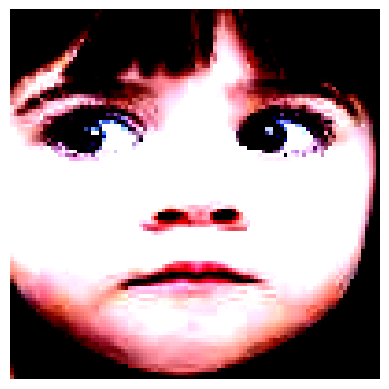

Original image with label: Surprise (0)


,Surprise,Fear,Disgust,Happiness,Sadness,Anger,Neutral,Predicted
ConvNet,0.114702,0.114702,0.114702,0.114702,0.114702,0.114702,0.311791,Neutral
ResNet18,0.729865,0.000737,0.003321,0.000919,0.000773,0.001187,0.263198,Surprise
VGG16,0.708417,0.283561,0.000007,0.000235,0.007737,0.000006,0.000037,Surprise
GoogLeNet,0.083830,0.000207,0.001981,0.001647,0.101593,0.000017,0.810724,Neutral
ViT-B/16,0.936075,0.000087,0.000662,0.000113,0.003661,0.000400,0.059003,Surprise
ViT-mod,0.203453,0.072487,0.156327,0.103575,0.124257,0.177400,0.162502,Surprise


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


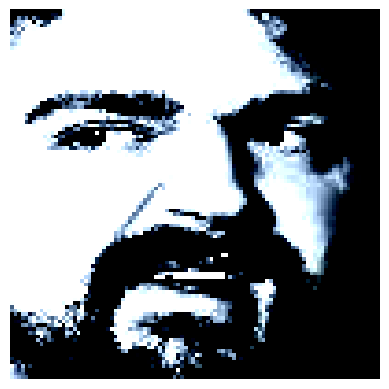

Original image with label: Disgust (2)


,Surprise,Fear,Disgust,Happiness,Sadness,Anger,Neutral,Predicted
ConvNet,1.147015e-01,1.147015e-01,0.114702,1.147015e-01,1.147015e-01,0.311791,1.147015e-01,Anger
ResNet18,7.934178e-04,7.112413e-03,0.010365,1.017236e-04,6.917056e-05,0.980826,7.319400e-04,Anger
VGG16,5.641036e-08,1.574523e-08,0.010435,6.977641e-07,1.231890e-07,0.989564,1.206483e-07,Anger
GoogLeNet,2.384253e-07,5.808154e-07,0.999527,2.576034e-06,2.764695e-05,0.000394,4.861802e-05,Disgust
ViT-B/16,6.130263e-05,2.805341e-05,0.000026,2.894941e-05,2.447931e-05,0.999444,3.870625e-04,Anger
ViT-mod,9.922687e-02,1.953804e-01,0.125122,6.915051e-02,1.634120e-01,0.198612,1.490959e-01,Anger


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


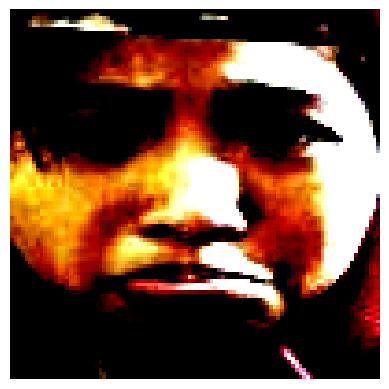

Original image with label: Sadness (4)


,Surprise,Fear,Disgust,Happiness,Sadness,Anger,Neutral,Predicted
ConvNet,1.147015e-01,1.147015e-01,1.147015e-01,1.147015e-01,0.311791,1.147015e-01,1.147015e-01,Sadness
ResNet18,8.378302e-06,1.997532e-06,2.234479e-04,1.793081e-04,0.990660,3.229792e-07,8.926976e-03,Sadness
VGG16,2.135967e-14,4.006036e-15,4.338863e-13,3.613172e-11,1.000000,2.440067e-14,2.332053e-10,Sadness
GoogLeNet,6.337516e-08,1.018798e-07,4.716787e-09,2.484086e-07,0.999672,2.589418e-08,3.273684e-04,Sadness
ViT-B/16,1.737191e-05,8.458795e-05,6.783687e-05,5.941111e-05,0.992874,1.404042e-05,6.882503e-03,Sadness
ViT-mod,1.746371e-01,7.766322e-02,1.440760e-01,8.507323e-02,0.135976,1.907848e-01,1.917894e-01,Neutral


In [5]:
reshape_image_transform = T.Resize((224, 224))

dataframes = {}

with torch.no_grad():

    for class_idx in [0, 2, 4]:
        images_idxs = val_dataset.labels.index(class_idx)
        img = val_dataset[images_idxs][0]

        plt.imshow(img.permute(1, 2, 0).numpy())
        # no axis
        plt.axis('off')
        plt.show()
        print("Original image with label:", val_dataset.class_names[class_idx], f"({class_idx})")

        img_tensor = img.unsqueeze(0).to(device)
        img_upscaled_tensor = reshape_image_transform(img).unsqueeze(0).to(device)

        probs = {
            'ConvNet': F.softmax(model_ConvNet(img_tensor), dim=1).cpu().numpy().flatten(),
            'ResNet18': F.softmax(model_ResNet(img_upscaled_tensor), dim=1).cpu().numpy().flatten(),
            'VGG16': F.softmax(model_VGG(img_upscaled_tensor), dim=1).cpu().numpy().flatten(),
            'GoogLeNet': F.softmax(model_GoogLeNet(img_upscaled_tensor), dim=1).cpu().numpy().flatten(),
            'ViT-B/16': F.softmax(model_ViT(img_upscaled_tensor), dim=1).cpu().numpy().flatten(),
            'ViT-mod': F.softmax(model_ViT_mod(img_tensor), dim=1).cpu().numpy().flatten(),
        }

        # Create DataFrame
        df = pd.DataFrame.from_dict(probs, orient='index', columns=val_dataset.class_names)

        # Highlight the predicted class
        df['Predicted'] = df[val_dataset.class_names].idxmax(axis=1)

        # show
        display(df)

        dataframes[class_idx] = df
        

In [15]:
print(dataframes[4].to_latex())

\begin{tabular}{lrrrrrrrl}
\toprule
 & Surprise & Fear & Disgust & Happiness & Sadness & Anger & Neutral & Predicted \\
\midrule
ConvNet & 0.114702 & 0.114702 & 0.114702 & 0.114702 & 0.311791 & 0.114702 & 0.114702 & Sadness \\
ResNet18 & 0.000008 & 0.000002 & 0.000223 & 0.000179 & 0.990660 & 0.000000 & 0.008927 & Sadness \\
VGG16 & 0.000000 & 0.000000 & 0.000000 & 0.000000 & 1.000000 & 0.000000 & 0.000000 & Sadness \\
GoogLeNet & 0.000000 & 0.000000 & 0.000000 & 0.000000 & 0.999672 & 0.000000 & 0.000327 & Sadness \\
ViT-B/16 & 0.000017 & 0.000085 & 0.000068 & 0.000059 & 0.992874 & 0.000014 & 0.006883 & Sadness \\
ViT-mod & 0.174637 & 0.077663 & 0.144076 & 0.085073 & 0.135976 & 0.190785 & 0.191789 & Neutral \\
\bottomrule
\end{tabular}

